# <center>Financial Data Analysis</center>

## Libraries imported to assist in the analysis

Below are the set of libraries imported into this python notebook that is useful in doing exploratory and predictive data analysis.

In [85]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier,MLPRegressor
import matplotlib

## Importing the data

A boxplot of imported data is constructed to understand the inner structure of the data

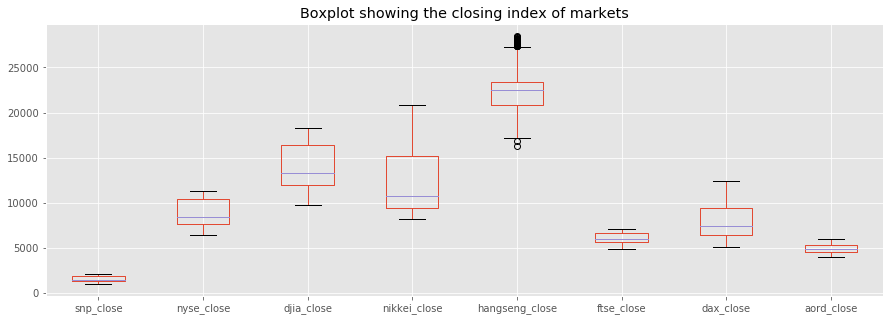

In [86]:
matplotlib.style.use('ggplot')
cd=pd.read_pickle("./closing_data_pickle")
cd=cd.sort_index()
plt.figure(figsize=(15,5))
cd.boxplot()
plt.title("Boxplot showing the closing index of markets")

## Visulaizing the trend of closing index value across markets

The graph is constructed to visulaize the trend of closing index across time, an insightful information

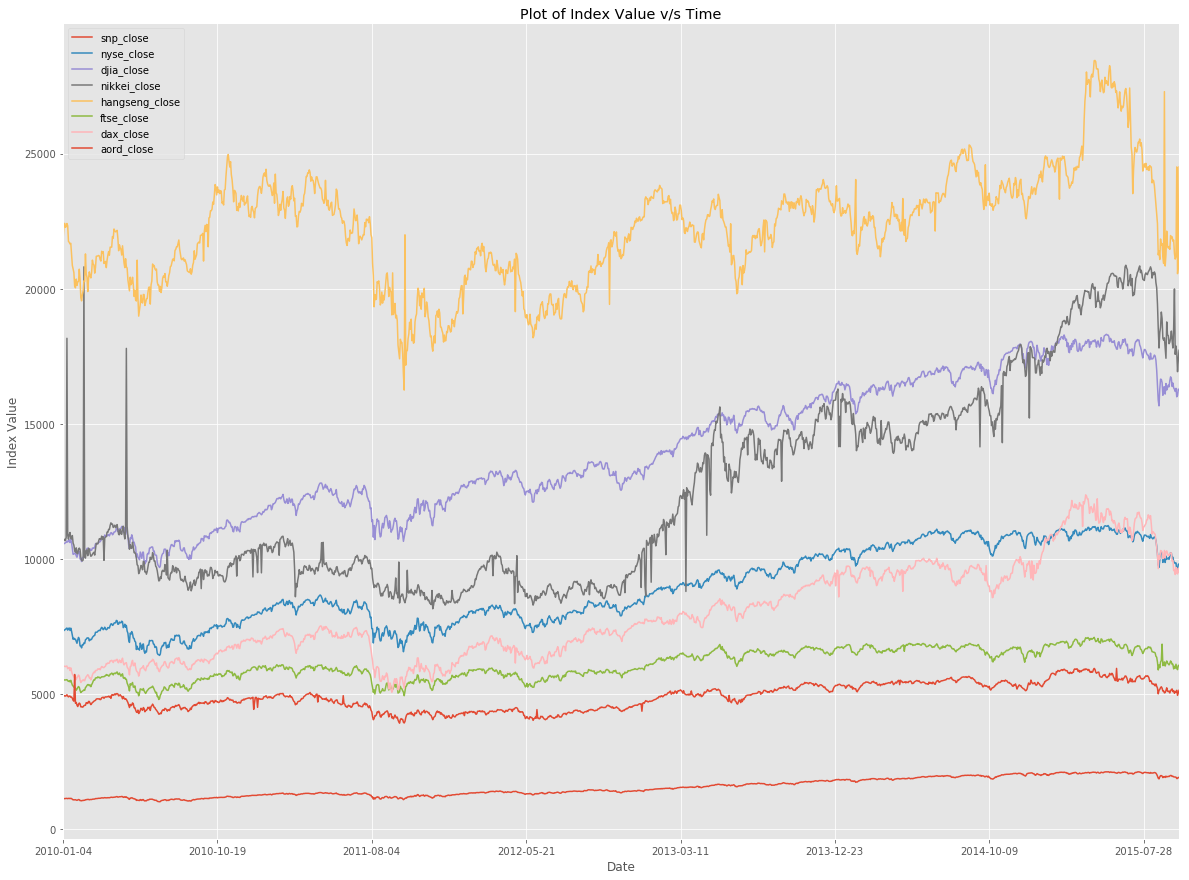

In [87]:
cd.plot(figsize=(20,15),title="Plot of Index Value v/s Time")
plt.xlabel("Date")
plt.ylabel("Index Value")

## Autocorrelation Plot

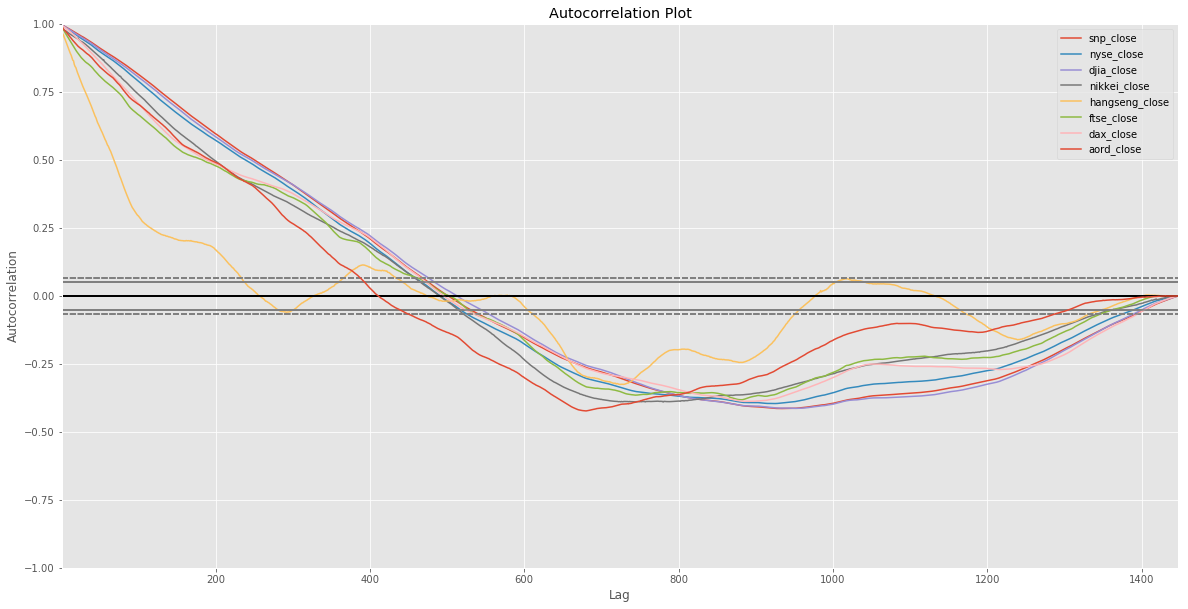

In [88]:
# Plotting autocorrelation
column_names=cd.columns.values
plt.figure(figsize=(20,10))
for i in range(0,len(column_names)):
    autocorrelation_plot(cd[column_names[i]],label=column_names[i])
plt.title("Autocorrelation Plot")

## Visualizing the trend of scaled closing value index across markets

The graph is constructed to visulaize the trend of closing index across time, an insightful information

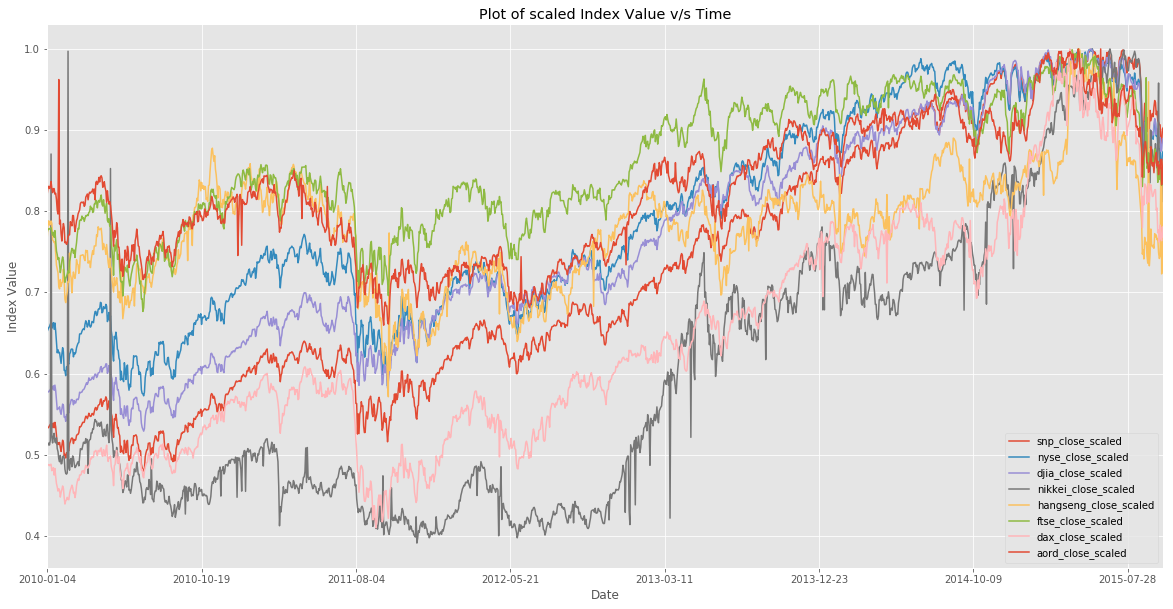

In [89]:
column_names=cd.columns.values+"_scaled"
for i in range(0,len(column_names)):
    cd[column_names[i]]=cd.iloc[:,i]/max(cd.iloc[:,i])

cd=cd.iloc[:,len(column_names):]
cd.plot(figsize=(20,10),title="Plot of scaled Index Value v/s Time")
plt.xlabel("Date")
plt.ylabel("Index Value")


## Plotting scatter matrix of scaled variables

Scatter matrix gives the idea of correalation across scaled features

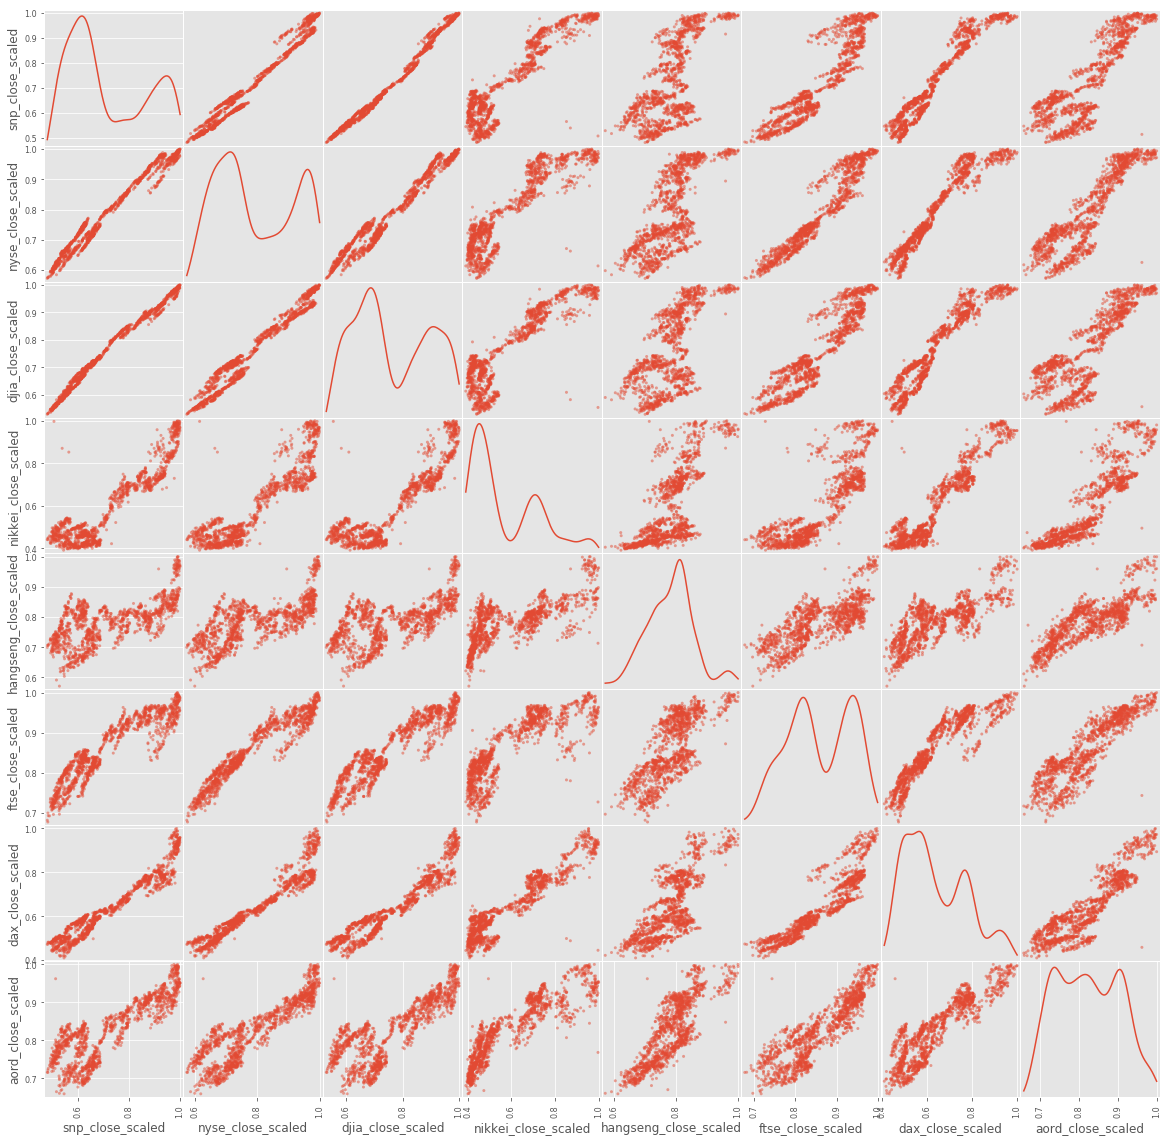

In [90]:
scatter_matrix(cd,figsize=(20,20),diagonal='kde')
plt.show()

## Log scaling the stock market indexes across the world

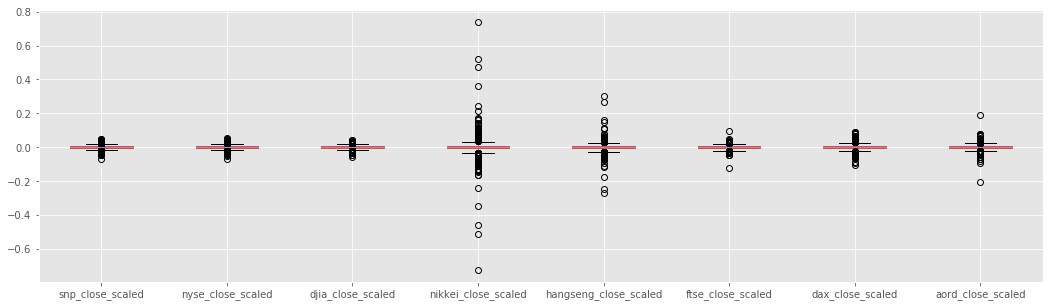

In [91]:
log_return_data = pd.DataFrame()
for i in range(0,len(column_names)):
    log_return_data[column_names[i]]=np.log(cd.iloc[:,i]/cd.iloc[:,i].shift())

plt.figure(figsize=(18,5))    
log_return_data.boxplot()
plt.show()


## Visualizing the trend of log scaled stock market indexes over time

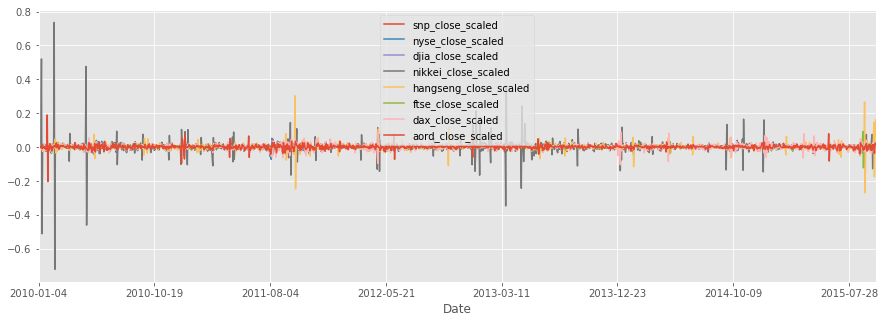

In [92]:
log_return_data.plot(figsize=(15,5))
plt.show()

## Visualizing the autocorrelation values  of log scaled stock indexes

We now see that there exists no trend in the data which indicates that this is now ready for predictive analysis.

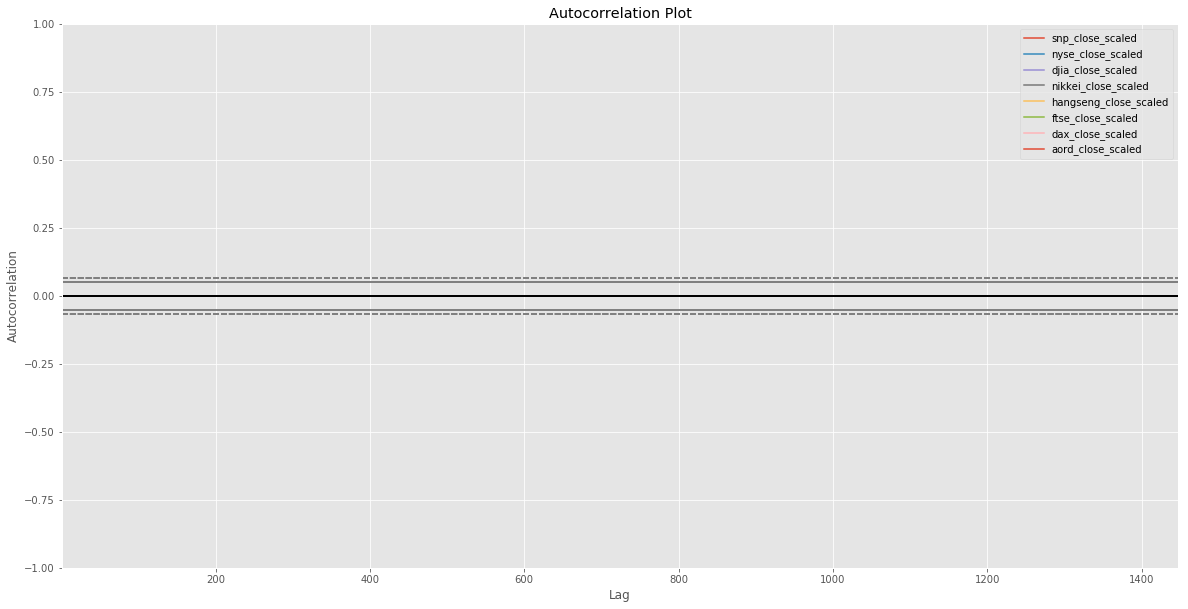

In [93]:
# Plotting the autocorrelation betweeen log scaled values of features among themselves
column_names=log_return_data.columns.values
plt.figure(figsize=(20,10))
for i in range(0,len(column_names)):
    autocorrelation_plot(log_return_data[column_names[i]],label=column_names[i])
plt.title("Autocorrelation Plot")
plt.show()

## Visualizing the correlation among log scaled feature values

We see some correlation among feature variables

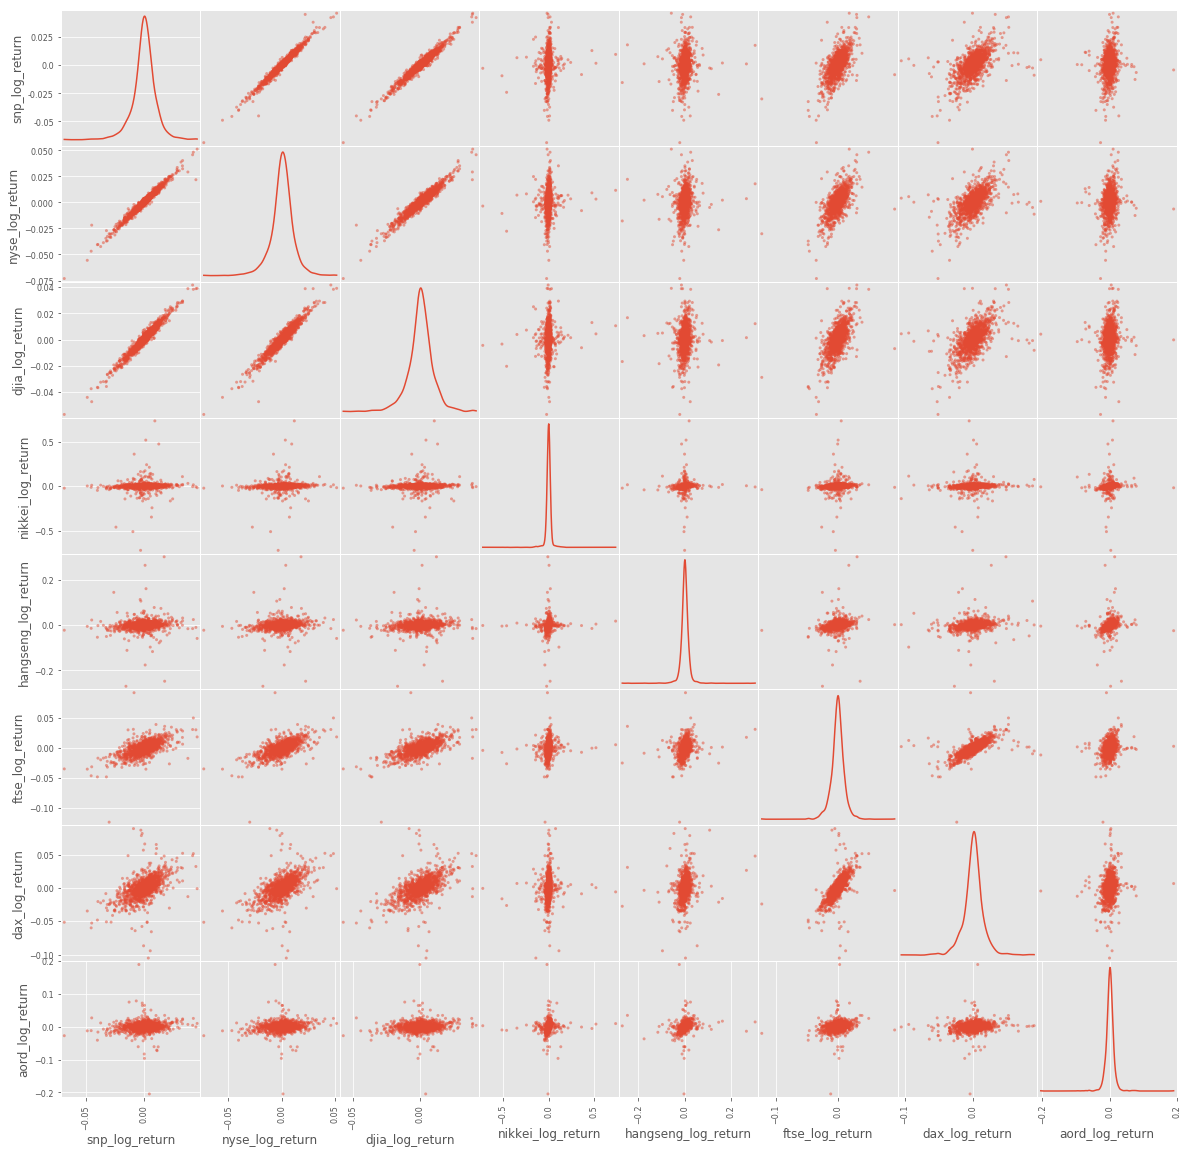

In [18]:
_= scatter_matrix(log_return_data, figsize=(20, 20), diagonal='kde')

## Does the Stock index present day value depends on the previous day. Let's see

As guessed correctly, hardly any correlation. Remember stock market prices trend is a markov's process

In [40]:
tmp = pd.DataFrame()
tmp['snp_0'] = log_return_data['snp_log_return']
tmp['nyse_1'] = log_return_data['nyse_log_return'].shift()
tmp['djia_1'] = log_return_data['djia_log_return'].shift()
tmp['ftse_0'] = log_return_data['ftse_log_return']
tmp['dax_0'] = log_return_data['dax_log_return']
tmp['hangseng_0'] = log_return_data['hangseng_log_return']
tmp['nikkei_0'] = log_return_data['nikkei_log_return']
tmp['aord_0'] = log_return_data['aord_log_return']
tmp.corr().iloc[:,0]

snp_0         1.000000
nyse_1       -0.038903
djia_1       -0.047759
ftse_0        0.616881
dax_0         0.555481
hangseng_0    0.109549
nikkei_0      0.079456
aord_0        0.122911
Name: snp_0, dtype: float64

# Predictive Analysis

## 1) Adding new features to the dataset

Can also ignore the addition of these features. Neural Network model automatically determines imporatant features from the dataset. These features are added to depict this feature of Neural Network analysis

In [57]:
column_names=log_return_data.columns.values
correlated_columns=["snp","nyse","djia"]
def create_empty_training_test_dataframe():
    new_column=column_names[0]+"_positive"
    new_column_names=[]
    for i in range(0,len(column_names)):
        if "snp" in column_names[i] or "nyse" in column_names[i] or "djia" in column_names[i]:
            for k in range(1,4):
                new_column_names.append(column_names[i]+"_"+str(k))
        else:
            for k in range(0,3):
                new_column_names.append(column_names[i]+"_"+str(k))
    new_column_names.insert(0,new_column)
    training_test_data = pd.DataFrame(
      columns=new_column_names)
    return training_test_data.copy()

new_column=column_names[0]+"_positive"
log_return_data[new_column]=0
log_return_data.loc[log_return_data.iloc[:,0] >= 0, new_column] = 1
training_test_data=create_empty_training_test_dataframe()
column_names_training_test=training_test_data.columns.values
# print (column_names_training_test)

for i in range(8,len(log_return_data)):
    temp_dict={}
    temp_dict[column_names_training_test[0]] = log_return_data[new_column].iloc[i]
    for j in range(0,len(column_names)):
        if correlated_columns[0] in column_names[j] or correlated_columns[1] in column_names[j] or\
        correlated_columns[2] in column_names[j]:
            for k in range(1,4):
                temp_dict[column_names[j]+"_"+str(k)] = log_return_data[column_names[j]].iloc[i-k]
        else:
            for k in range(0,3):
                temp_dict[column_names[j]+"_"+str(k)] = log_return_data[column_names[j]].iloc[i-k]

    
    training_test_data=training_test_data.append(temp_dict,ignore_index=True)
    
training_test_data=training_test_data.dropna()
training_test_data.head()

,snp_close_scaled_scaled_positive,snp_close_scaled_scaled_1,snp_close_scaled_scaled_2,snp_close_scaled_scaled_3,nyse_close_scaled_scaled_1,nyse_close_scaled_scaled_2,nyse_close_scaled_scaled_3,djia_close_scaled_scaled_1,djia_close_scaled_scaled_2,djia_close_scaled_scaled_3,...,hangseng_close_scaled_scaled_2,ftse_close_scaled_scaled_0,ftse_close_scaled_scaled_1,ftse_close_scaled_scaled_2,dax_close_scaled_scaled_0,dax_close_scaled_scaled_1,dax_close_scaled_scaled_2,aord_close_scaled_scaled_0,aord_close_scaled_scaled_1,aord_close_scaled_scaled_2
0,1.0,0.008291,-0.009425,0.001745,0.008066,-0.010608,0.003187,0.005023,-0.003450,0.004304,...,-0.003794,0.004503,-0.004593,-0.007140,0.004307,0.003383,-0.016273,0.005962,-0.006408,-0.010007
1,0.0,0.002423,0.008291,-0.009425,0.002471,0.008066,-0.010608,0.002784,0.005023,-0.003450,...,-0.026231,-0.007815,0.004503,-0.004593,-0.019033,0.004307,0.003383,0.000020,0.005962,-0.006408
2,1.0,-0.010882,0.002423,0.008291,-0.012392,0.002471,0.008066,-0.009465,0.002784,0.005023,...,-0.001456,0.010521,-0.007815,0.004503,0.016961,-0.019033,0.004307,-0.008127,0.000020,0.005962
3,0.0,0.012422,-0.010882,0.002423,0.011742,-0.012392,0.002471,0.010854,-0.009465,0.002784,...,-0.002895,-0.016884,0.010521,-0.007815,-0.021129,0.016961,-0.019033,0.001124,-0.008127,0.000020
4,0.0,-0.010654,0.012422,-0.010882,-0.015413,0.011742,-0.012392,-0.011466,0.010854,-0.009465,...,0.001099,-0.015936,-0.016884,0.010521,-0.018030,-0.021129,0.016961,-0.009338,0.001124,-0.008127


## 2) Seperating data into training and testing dataset

In [61]:
# change vairbale names
predictors_tf = training_test_data[training_test_data.columns[2:]]
#predictors_tf =training_test_data[training_test_data.columns[[3,6,9,12,15,18]]]
classes_tf = training_test_data[training_test_data.columns[:2]]

# 80% of the training data
training_set_size = int(len(training_test_data) * 0.8)
test_set_size = len(training_test_data) - training_set_size

training_predictors_tf = predictors_tf[:training_set_size]
training_classes_tf = classes_tf[:training_set_size]
test_predictors_tf = predictors_tf[training_set_size:]
test_classes_tf = classes_tf[training_set_size:]

training_predictors_tf.describe()

,snp_close_scaled_scaled_2,snp_close_scaled_scaled_3,nyse_close_scaled_scaled_1,nyse_close_scaled_scaled_2,nyse_close_scaled_scaled_3,djia_close_scaled_scaled_1,djia_close_scaled_scaled_2,djia_close_scaled_scaled_3,nikkei_close_scaled_scaled_0,nikkei_close_scaled_scaled_1,...,hangseng_close_scaled_scaled_2,ftse_close_scaled_scaled_0,ftse_close_scaled_scaled_1,ftse_close_scaled_scaled_2,dax_close_scaled_scaled_0,dax_close_scaled_scaled_1,dax_close_scaled_scaled_2,aord_close_scaled_scaled_0,aord_close_scaled_scaled_1,aord_close_scaled_scaled_2
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,...,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.000443,0.000449,0.000323,0.000305,0.000314,0.000385,0.000372,0.000380,0.000298,0.000266,...,0.000073,0.000167,0.000154,0.000152,0.000375,0.000361,0.000350,0.000092,0.000084,0.000086
std,0.010290,0.010289,0.010921,0.010922,0.010920,0.009345,0.009340,0.009339,0.048296,0.048293,...,0.019706,0.010025,0.010022,0.010024,0.014524,0.014514,0.014522,0.014492,0.014493,0.014491
min,-0.068958,-0.068958,-0.073116,-0.073116,-0.073116,-0.057061,-0.057061,-0.057061,-0.723609,-0.723609,...,-0.247415,-0.047792,-0.047792,-0.047792,-0.105248,-0.105248,-0.105248,-0.204556,-0.204556,-0.204556
25%,-0.004005,-0.003995,-0.004430,-0.004465,-0.004430,-0.003868,-0.003868,-0.003855,-0.008265,-0.008342,...,-0.006313,-0.004862,-0.004862,-0.004865,-0.005654,-0.005654,-0.005684,-0.004896,-0.004910,-0.004910
50%,0.000720,0.000723,0.000648,0.000645,0.000648,0.000562,0.000560,0.000562,0.000453,0.000449,...,0.000000,0.000229,0.000223,0.000223,0.000757,0.000757,0.000757,0.000604,0.000551,0.000551
75%,0.005594,0.005594,0.005926,0.005911,0.005911,0.005099,0.005079,0.005079,0.009587,0.009550,...,0.006961,0.005666,0.005655,0.005655,0.006803,0.006792,0.006792,0.005853,0.005853,0.005853
max,0.046317,0.046317,0.051173,0.051173,0.051173,0.041533,0.041533,0.041533,0.736393,0.736393,...,0.302602,0.050323,0.050323,0.050323,0.089195,0.089195,0.089195,0.189025,0.189025,0.189025


## 3) Predict S&P trend using Logistic Regression

In [63]:
# Predicting the S&P trend(whether it will go up or down) using Logistic Regression

# Step 1) Create Logistic Regression object with personlized arguments
logistic = LogisticRegression()

# Step 2) Use object created above to build the Logistic Regression model and train on the dataset
model=logistic.fit(training_predictors_tf.as_matrix(),training_classes_tf.as_matrix()[:,0])

# Step 3) Predict on the test data using model created above
predicted=logistic.predict(test_predictors_tf.as_matrix())

# Step 4) Calculate the accuracy acheived
temp=predicted==test_classes_tf.as_matrix()[:,0]
accuracy=len(temp[temp==True])/len(temp)
print ("Accuracy using Logistic Regression Model = ",accuracy,"\n")

# Or you can combine Step 3 and Step 4 into one using below state
# print ("Accuracy using Logistic Regression Model = ",
#        model.score(test_predictors_tf.as_matrix(),test_classes_tf.as_matrix()[:,0]))

# Generating the classfication Report
print ("Classification Report : \n\n",
       metrics.classification_report(test_classes_tf.as_matrix()[:,0], predicted))

# Generating confusion matrix
print ("Confusion Matrix : \n",
       metrics.confusion_matrix(test_classes_tf.as_matrix()[:,0], predicted))

# Verifying model using 10 fold cross validation
scores = cross_val_score(LogisticRegression(), training_predictors_tf.as_matrix(), 
                         training_classes_tf.as_matrix()[:,0], scoring='accuracy', cv=10)
print ("\nMean accuracy validated using Cross Validation: ",scores.mean())
# write interpretation ofresult -- markdown
# convert into class - review. NO HARDCODING

Accuracy using Logistic Regression Model =  0.5173611111111112 

Classification Report : 

              precision    recall  f1-score   support

        0.0       1.00      0.03      0.07       144
        1.0       0.51      1.00      0.67       144

avg / total       0.75      0.52      0.37       288

Confusion Matrix : 
 [[  5 139]
 [  0 144]]

Mean accuracy validated using Cross Validation:  0.561231094979


## 4) Predict S&P trend using RandomForestClassifier

In [64]:
# Predicting the S&P trend(whether it will go up or down) using RandomForestClassifier

# Step 1) Create Random Forest Classifier object with personlized arguments
clf = RandomForestClassifier(n_estimators=100)

# Step 2) Use object created above to build the RandomForestClassifier model and train on the dataset
model=clf.fit(training_predictors_tf.as_matrix(), training_classes_tf.as_matrix()[:,0])

# Step 3) Predict on the test data using model created above
predicted=clf.predict(test_predictors_tf.as_matrix())

# Step 4) Calculate the accuracy acheived
temp=predicted==test_classes_tf.as_matrix()[:,0]
accuracy=len(temp[temp==True])/len(temp)
print ("Accuracy using Random Forest Classifier Model = ",accuracy,"\n")

# Or you can combine Step 3 and Step 4 into one using below state
# print ("Accuracy using Random Forest Classifier Model = ",
#        model.score(test_predictors_tf.as_matrix(),test_classes_tf.as_matrix()[:,0]))

# Generating the classfication Report
print ("Classification Report : \n\n",
       metrics.classification_report(test_classes_tf.as_matrix()[:,0], predicted))

# Generating confusion matrix
print ("Confusion Matrix : \n",
       metrics.confusion_matrix(test_classes_tf.as_matrix()[:,0], predicted))

# Verifying model using 10 fold cross validation
scores = cross_val_score(RandomForestClassifier(n_estimators=100), training_predictors_tf.as_matrix(), 
                         training_classes_tf.as_matrix()[:,0], scoring='accuracy', cv=10)
print ("\nMean accuracy validated using Cross Validation: ",scores.mean())

Accuracy using Random Forest Classifier Model =  0.7083333333333334 

Classification Report : 

              precision    recall  f1-score   support

        0.0       0.74      0.64      0.69       144
        1.0       0.68      0.78      0.73       144

avg / total       0.71      0.71      0.71       288

Confusion Matrix : 
 [[ 92  52]
 [ 32 112]]

Mean accuracy validated using Cross Validation:  0.713236145085


## 5) Predict S&P trend using Neural Network MLPClassifier

In [65]:
# Predicting the S&P trend(whether it will go up or down) using Neural Network MLPClassfier

# Step 1) Create Mulit-Layer Perceptron Classifier object with personlized arguments
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(2, ), random_state=1,activation='logistic',max_iter=200)

# Step 2) Use object created above to build the Neural Network model and train on the dataset
model=clf.fit(training_predictors_tf.as_matrix(), training_classes_tf.as_matrix()[:,0]) 

# Step 3) Predict on the test data using model created above
predicted=clf.predict(test_predictors_tf.as_matrix())

# Step 4) Calculate the accuracy acheived
temp=predicted==test_classes_tf.as_matrix()[:,0]
accuracy=len(temp[temp==True])/len(temp)
print ("Accuracy using Neural Network Classifier Model = ",accuracy,"\n")

# Or you can combine Step 3 and Step 4 into one using below state
# print ("Accuracy using Neural Network Classifier Model = ",
#        model.score(test_predictors_tf.as_matrix(),test_classes_tf.as_matrix()[:,0]))

# Generating the classfication Report
print ("Classification Report : \n\n",
       metrics.classification_report(test_classes_tf.as_matrix()[:,0], predicted))

# Generating confusion matrix
print ("Confusion Matrix : \n",
       metrics.confusion_matrix(test_classes_tf.as_matrix()[:,0], predicted))

# Verifying model using 10 fold cross validation
scores = cross_val_score(RandomForestClassifier(n_estimators=100), training_predictors_tf.as_matrix(), 
                         training_classes_tf.as_matrix()[:,0], scoring='accuracy', cv=10)
print ("\nMean accuracy validated using Cross Validation: ",scores.mean())

Accuracy using Neural Network Classifier Model =  0.7083333333333334 

Classification Report : 

              precision    recall  f1-score   support

        0.0       0.75      0.62      0.68       144
        1.0       0.68      0.79      0.73       144

avg / total       0.71      0.71      0.71       288

Confusion Matrix : 
 [[ 90  54]
 [ 30 114]]

Mean accuracy validated using Cross Validation:  0.708774691602


## Regression Analysis Begins

## 1) Seperating data into training and testing dataset

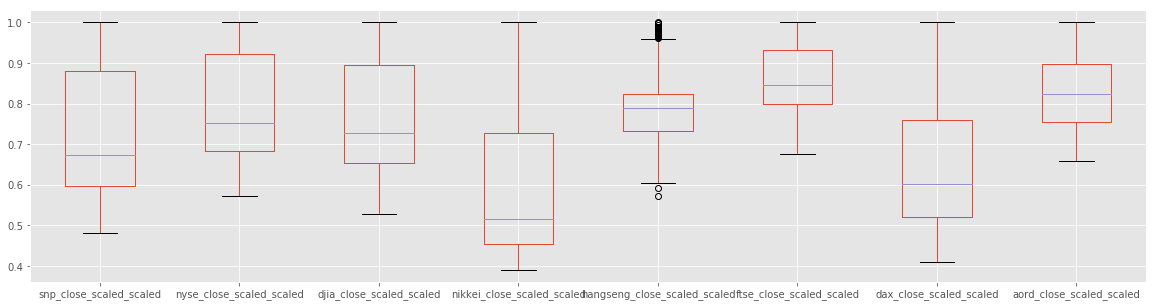

In [73]:
plt.figure(figsize=(20,5))
cd.boxplot()
plt.show()

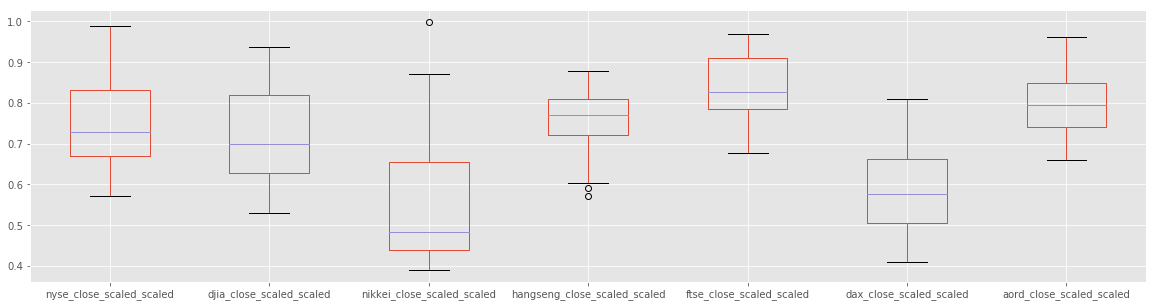

In [77]:
# Creating dataframe for Linear Regression Analysis
# sclaed with max value
closing_data=cd[cd.columns[0:8]]   # using all scaled features 

# Sample train and test data : we are using 80% of the dataset as training data
predictors_tf = closing_data[closing_data.columns[1:]]
classes_tf = closing_data[closing_data.columns[:1]]

training_set_size = int(len(closing_data) * 0.8)
test_set_size = len(closing_data) - training_set_size

training_predictors_tf = predictors_tf[:training_set_size]
training_classes_tf = classes_tf[:training_set_size]
test_predictors_tf = predictors_tf[training_set_size:]
test_classes_tf = classes_tf[training_set_size:]

plt.figure(figsize=(20,5))
training_predictors_tf.boxplot()
plt.show()

## 2) Predict S&P index value using Linear Regression

Mean squared error:  0.000350671008671
R squared value:  0.995835124248
Root Mean Squared Error:  0.0187262118078


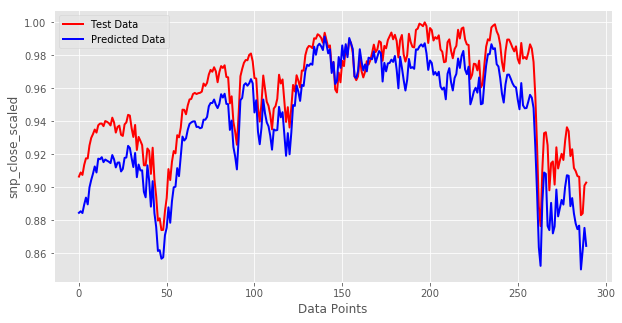

In [78]:
# Predicting the S&P index value using Linear Regression

# Step 1) Create Linear Regression object
regr = LinearRegression()

# Step 2) Use object created above to build the Linear Regression model and train on the dataset
model=regr.fit(training_predictors_tf.as_matrix(), training_classes_tf.as_matrix()[:,0])

# Step 3) Predict on the test data using model created above
predicted=regr.predict(test_predictors_tf.as_matrix())

# Step 4) Calculate the accuracy achieved
print("Mean squared error: ",
      np.mean((predicted- test_classes_tf.as_matrix()[:,0]) ** 2))

SSE = np.sum((regr.predict(test_predictors_tf.as_matrix()) - test_classes_tf.as_matrix()[:,0]) ** 2)
SST = np.sum((np.mean(training_classes_tf.as_matrix()[:,0]) - test_classes_tf.as_matrix()[:,0])**2) 
R2=1.0-1.0*SSE/SST  
RMSE=np.sqrt(SSE/len(test_classes_tf.as_matrix()[:,0])) 

print("R squared value: ",R2)
print("Root Mean Squared Error: ",RMSE)

# Step 5) Plot the  outputs
plt.figure(figsize=(10,5))
plt.plot(pd.Series(range(0,len(test_classes_tf.as_matrix()[:,0]))),test_classes_tf.as_matrix()[:,0],
         color='red',label='Test Data',linewidth=2)
plt.plot(pd.Series(range(0,len(test_classes_tf.as_matrix()[:,0]))), 
         regr.predict(test_predictors_tf.as_matrix()), color='blue',
        linewidth=2,label="Predicted Data")
plt.xlabel("Data Points")
plt.ylabel("snp_close_scaled")
plt.legend(loc='upper left')


## 3) Predict S&P index value using Neural Network MLP Regressor

Mean squared error:  0.0775830410826
R squared value:  0.0785559153297
Root Mean Squared Error:  0.278537324398


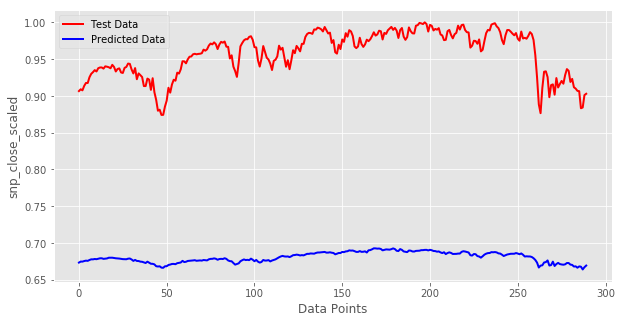

In [80]:
# Predicting the S&P index value using Neural Network MLP Regressor

# Step 1) Create Neural Network MLP Regressor object with personlized arguments
mlpr = MLPRegressor(solver='adam',alpha=1e-5,
                     hidden_layer_sizes=(2, ), random_state=1,activation='logistic',max_iter=200)

# Step 2) Use object created above to build the Neural Network model and train on the dataset
model=mlpr.fit(training_predictors_tf.as_matrix(), training_classes_tf.as_matrix()[:,0]) 

# Step 3) Predict on the test data using model created above
predicted=mlpr.predict(test_predictors_tf.as_matrix())

# Step 4) Calculate the accuracy achieved
print("Mean squared error: ",
      np.mean((predicted- test_classes_tf.as_matrix()[:,0]) ** 2))

SSE = np.sum((mlpr.predict(test_predictors_tf.as_matrix()) - test_classes_tf.as_matrix()[:,0]) ** 2)
SST = np.sum((np.mean(training_classes_tf.as_matrix()[:,0]) - test_classes_tf.as_matrix()[:,0])**2) 
R2=1.0-1.0*SSE/SST 
RMSE=np.sqrt(SSE/len(test_classes_tf.as_matrix()[:,0])) 

print("R squared value: ",R2)
print("Root Mean Squared Error: ",RMSE)

# Step 5) Plot the  outputs
plt.figure(figsize=(10,5))
plt.plot(pd.Series(range(0,len(test_classes_tf.as_matrix()[:,0]))),test_classes_tf.as_matrix()[:,0],
         color='red',label='Test Data',linewidth=2)
plt.plot(pd.Series(range(0,len(test_classes_tf.as_matrix()[:,0]))), 
         predicted, color='blue',
        linewidth=2,label="Predicted Data")
plt.xlabel("Data Points")
plt.ylabel("snp_close_scaled")
plt.legend(loc='upper left')


## 4) Predict S&P index value using RandomForestRegressor

Mean squared error:  0.00277142905025
R squared value:  0.96708408347
Root Mean Squared Error:  0.0526443638983


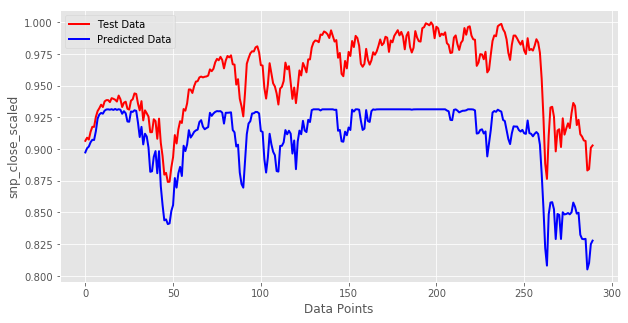

In [81]:
# Predicting the S&P trend(whether it will go up or down) using RandomForestRegressor

# Step 1) Create Random Forest Regressor object with personlized arguments
rfr = RandomForestRegressor(n_estimators=1000)

# Step 2) Use object created above to build the RandomForestRegressor model and train on the dataset
model=rfr.fit(training_predictors_tf.as_matrix(), training_classes_tf.as_matrix()[:,0])

# Step 3) Predict on the test data using model created above
predicted=rfr.predict(test_predictors_tf.as_matrix())

# Step 4) Calculate the accuracy achieved
print("Mean squared error: ",
      np.mean((predicted- test_classes_tf.as_matrix()[:,0]) ** 2))

SSE = np.sum((rfr.predict(test_predictors_tf.as_matrix()) - test_classes_tf.as_matrix()[:,0]) ** 2)
SST = np.sum((np.mean(training_classes_tf.as_matrix()[:,0]) - test_classes_tf.as_matrix()[:,0])**2) 
R2=1.0-1.0*SSE/SST 
RMSE=np.sqrt(SSE/len(test_classes_tf.as_matrix()[:,0])) 

print("R squared value: ",R2)
print("Root Mean Squared Error: ",RMSE)

# Step 5) Plot the  outputs
plt.figure(figsize=(10,5))
plt.plot(pd.Series(range(0,len(test_classes_tf.as_matrix()[:,0]))),test_classes_tf.as_matrix()[:,0],
         color='red',label='Test Data',linewidth=2)
plt.plot(pd.Series(range(0,len(test_classes_tf.as_matrix()[:,0]))), 
         predicted, color='blue',
        linewidth=2,label="Predicted Data")
plt.xlabel("Data Points")
plt.ylabel("snp_close_scaled")
plt.legend(loc='upper left')